In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pd.set_option("display.max_rows",40)

In [ ]:
movies_df = pd.read_csv('Movie.csv',header=None)

In [ ]:
movies_df.sample(5)

,userId,movie,rating
1385,3761,Toy Story (1995),4.5
786,2172,Toy Story (1995),5.0
7480,207,GoldenEye (1995),1.0
1658,4537,Toy Story (1995),5.0
7952,2270,GoldenEye (1995),3.0


In [ ]:
movies_df.nunique()

userId    4081
movie       10
rating      10
dtype: int64

In [ ]:
movies_df.groupby(["movie"])["rating"].count()

movie
Father of the Bride Part II (1995)     657
GoldenEye (1995)                      1548
Grumpier Old Men (1995)                685
Heat (1995)                           1260
Jumanji (1995)                        1155
Sabrina (1995)                         700
Sudden Death (1995)                    202
Tom and Huck (1995)                     78
Toy Story (1995)                      2569
Waiting to Exhale (1995)               138
Name: rating, dtype: int64

In [ ]:
movies_df.groupby(["movie"])["rating"].mean()

movie
Father of the Bride Part II (1995)    3.143836
GoldenEye (1995)                      3.427003
Grumpier Old Men (1995)               3.186861
Heat (1995)                           3.836508
Jumanji (1995)                        3.268398
Sabrina (1995)                        3.381429
Sudden Death (1995)                   3.017327
Tom and Huck (1995)                   3.352564
Toy Story (1995)                      3.959323
Waiting to Exhale (1995)              3.000000
Name: rating, dtype: float64

In [ ]:
movies_df.shape

(8992, 3)

In [ ]:
movies_df[movies_df["userId"]==11]


,userId,movie,rating
4,11,Toy Story (1995),4.5
7446,11,GoldenEye (1995),2.5


In [ ]:
movies_df.isna().sum()

userId    0
movie     0
rating    0
dtype: int64

In [ ]:
movies_df["rating"].value_counts()

3.0    2736
4.0    2660
5.0    1394
3.5     679
2.0     542
4.5     374
2.5     277
1.0     212
1.5      61
0.5      57
Name: rating, dtype: int64

<AxesSubplot:>

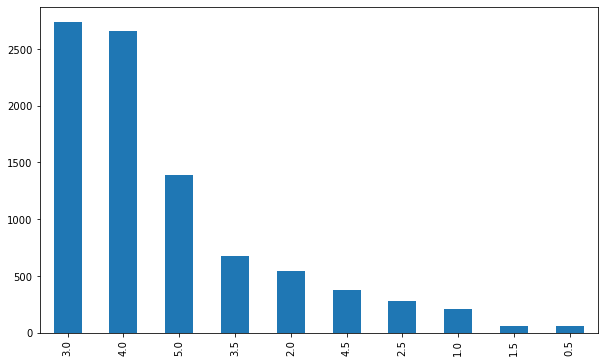

In [ ]:
plt.figure(figsize=(10,6))
movies_df["rating"].value_counts().plot(kind="bar")

In [ ]:
#number of unique users in the dataset
movies_df.userId.nunique()

4081

In [ ]:
movies_df.movie.nunique()

10

In [ ]:

movies_df.movie.unique()



array(['Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)',
       'Waiting to Exhale (1995)', 'Father of the Bride Part II (1995)',
       'Heat (1995)', 'Sabrina (1995)', 'Tom and Huck (1995)',
       'Sudden Death (1995)', 'GoldenEye (1995)'], dtype=object)

In [ ]:
user_movies_df = movies_df.pivot(index='userId',
                                 columns='movie',
                                 values='rating')

In [ ]:
user_movies_df

movie,Father of the Bride Part II (1995),GoldenEye (1995),Grumpier Old Men (1995),Heat (1995),Jumanji (1995),Sabrina (1995),Sudden Death (1995),Tom and Huck (1995),Toy Story (1995),Waiting to Exhale (1995)
userId,,,,,,,,,,
1,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
4,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7115,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7116,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
7117,NaN,3.0,4.0,5.0,NaN,3.0,1.0,NaN,4.0,NaN


In [ ]:
user_movies_df.values

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, 4. , ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, 4. , nan],
       ...,
       [nan, 3. , 4. , ..., nan, 4. , nan],
       [nan, nan, nan, ..., nan, 5. , nan],
       [nan, nan, nan, ..., nan, 4.5, nan]])

In [ ]:
#Impute those NaNs with 0 values
user_movies_df.fillna(0, inplace=True)

In [ ]:
user_movies_df

movie,Father of the Bride Part II (1995),GoldenEye (1995),Grumpier Old Men (1995),Heat (1995),Jumanji (1995),Sabrina (1995),Sudden Death (1995),Tom and Huck (1995),Toy Story (1995),Waiting to Exhale (1995)
userId,,,,,,,,,,
1,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
4,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7115,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7116,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
7117,0.0,3.0,4.0,5.0,0.0,3.0,1.0,0.0,4.0,0.0


In [ ]:
# 1->[0,0,0,0,3.5,0,0,0,]
# 2->[0,0,4.0,]


In [ ]:
#Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [ ]:
user_sim = 1 - pairwise_distances( user_movies_df.values,metric='cosine')

In [ ]:
user_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.55337157],
       [0.        , 1.        , 0.        , ..., 0.45883147, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.45883147, 1.        ,
        0.62254302],
       ...,
       [0.        , 0.45883147, 0.45883147, ..., 1.        , 0.45883147,
        0.47607054],
       [0.        , 0.        , 1.        , ..., 0.45883147, 1.        ,
        0.62254302],
       [0.55337157, 0.        , 0.62254302, ..., 0.47607054, 0.62254302,
        1.        ]])

In [ ]:
#Store the results in a dataframe
user_sim_df = pd.DataFrame(user_sim)

In [ ]:
user_sim_df.shape

(4081, 4081)

In [ ]:
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080
0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
1,0.000000,1.000000,0.000000,0.000000,0.000000,0.390567,0.707107,0.615457,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.458831,0.000000,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,1.000000,0.622543
3,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.615457,0.000000,0.388514,...,0.800000,0.000000,0.000000,0.000000,0.989949,0.000000,0.000000,0.619422,0.000000,0.000000
4,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4076,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.658505,0.000000,0.000000,0.000000
4077,0.000000,0.000000,0.752577,0.000000,0.000000,0.489886,0.000000,0.370543,0.752577,0.657870,...,0.000000,0.752577,0.000000,0.532152,0.000000,0.658505,1.000000,0.345306,0.752577,0.468511
4078,0.000000,0.458831,0.458831,0.619422,0.000000,0.701884,0.567775,0.889532,0.458831,0.568212,...,0.344124,0.458831,0.000000,0.324443,0.648886,0.000000,0.345306,1.000000,0.458831,0.476071
4079,0.000000,0.000000,1.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,1.000000,0.622543


In [ ]:
#Set the index and column names to user ids
user_sim_df.index = user_movies_df.index
user_sim_df.columns = user_movies_df.index

In [ ]:
user_sim_df

userId,1,2,3,4,5,6,7,8,10,11,...,7105,7107,7108,7110,7113,7115,7116,7117,7119,7120
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
2,0.000000,1.000000,0.000000,0.000000,0.000000,0.390567,0.707107,0.615457,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.458831,0.000000,0.000000
3,0.000000,0.000000,1.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,1.000000,0.622543
4,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.615457,0.000000,0.388514,...,0.800000,0.000000,0.000000,0.000000,0.989949,0.000000,0.000000,0.619422,0.000000,0.000000
5,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7115,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.658505,0.000000,0.000000,0.000000
7116,0.000000,0.000000,0.752577,0.000000,0.000000,0.489886,0.000000,0.370543,0.752577,0.657870,...,0.000000,0.752577,0.000000,0.532152,0.000000,0.658505,1.000000,0.345306,0.752577,0.468511
7117,0.000000,0.458831,0.458831,0.619422,0.000000,0.701884,0.567775,0.889532,0.458831,0.568212,...,0.344124,0.458831,0.000000,0.324443,0.648886,0.000000,0.345306,1.000000,0.458831,0.476071


In [ ]:
np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:5, 0:5]

userId,1,2,3,4,5
userId,,,,,
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0


In [ ]:
user_sim_df[11]

userId
1       0.000000
2       0.000000
3       0.874157
4       0.388514
5       0.000000
          ...   
7115    0.000000
7116    0.657870
7117    0.568212
7119    0.874157
7120    0.544201
Name: 11, Length: 4081, dtype: float64

In [ ]:

user_sim_df.sort_values([8],ascending=False).head(100)


userId,1,2,3,4,5,6,7,8,10,11,...,7105,7107,7108,7110,7113,7115,7116,7117,7119,7120
userId,,,,,,,,,,,,,,,,,,,,,
4831,0.000000,0.555136,0.555136,0.618580,0.000000,0.578181,0.392541,0.995703,0.555136,0.716360,...,0.475831,0.555136,0.000000,0.392541,0.616849,0.000000,0.417782,0.900596,0.555136,0.345596
614,0.000000,0.520266,0.520266,0.676346,0.000000,0.541863,0.367884,0.992625,0.520266,0.707458,...,0.520266,0.520266,0.000000,0.367884,0.674453,0.000000,0.391540,0.905125,0.520266,0.323888
2274,0.000000,0.482418,0.422116,0.759809,0.000000,0.463191,0.341121,0.972373,0.422116,0.632564,...,0.542720,0.422116,0.000000,0.298481,0.767523,0.000000,0.317675,0.913063,0.422116,0.262785
5043,0.000000,0.420589,0.600842,0.672943,0.000000,0.555383,0.297402,0.968856,0.600842,0.758666,...,0.480673,0.600842,0.000000,0.424859,0.679775,0.000000,0.452180,0.909761,0.600842,0.374050
5843,0.000000,0.380235,0.633724,0.671748,0.000000,0.561026,0.268866,0.959475,0.633724,0.800186,...,0.506979,0.633724,0.000000,0.448111,0.672166,0.000000,0.476926,0.894126,0.633724,0.394521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6636,0.000000,0.404226,0.646762,0.388057,0.000000,0.578883,0.285831,0.806060,0.646762,0.565371,...,0.000000,0.646762,0.000000,0.457330,0.457330,0.000000,0.486738,0.853169,0.646762,0.402637
188,0.000000,0.218218,0.654654,0.567367,0.000000,0.511372,0.154303,0.805823,0.654654,0.678246,...,0.218218,0.654654,0.000000,0.462910,0.617213,0.218218,0.636375,0.851064,0.654654,0.407550
2140,0.000000,0.512148,0.512148,0.384111,0.000000,0.533407,0.362143,0.803773,0.512148,0.447697,...,0.000000,0.512148,0.000000,0.362143,0.452679,0.256074,0.554056,0.837150,0.512148,0.318834


In [ ]:
user_sim_df[user_sim_df[8]>0.65]

userId,1,2,3,4,5,6,7,8,10,11,...,7105,7107,7108,7110,7113,7115,7116,7117,7119,7120
userId,,,,,,,,,,,,,,,,,,,,,
11,0.000000,0.000000,0.874157,0.388514,0.000000,0.569028,0.000000,0.669519,0.874157,0.000000,...,0.485643,0.874157,0.000000,0.618123,0.343401,0.000000,0.657870,0.568212,0.874157,0.544201
12,0.000000,0.437595,0.583460,0.262557,0.000000,0.835560,0.618853,0.718190,0.583460,0.510036,...,0.000000,0.583460,0.000000,0.412568,0.309426,0.291730,0.631204,0.870057,0.583460,0.605382
19,0.000000,0.419314,0.524142,0.314485,0.000000,0.846145,0.667124,0.709692,0.524142,0.458183,...,0.000000,0.524142,0.000000,0.370625,0.370625,0.000000,0.394457,0.913874,0.524142,0.616347
24,0.000000,0.000000,0.544331,0.653197,0.000000,0.620076,0.288675,0.670025,0.544331,0.674094,...,0.408248,0.544331,0.000000,0.384900,0.673575,0.272166,0.588873,0.842927,0.544331,0.564782
54,0.390567,0.000000,0.520756,0.650945,0.390567,0.338983,0.000000,0.657031,0.520756,0.708124,...,0.520756,0.520756,0.390567,0.644402,0.644402,0.390567,0.649099,0.642149,0.520756,0.540321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7055,0.000000,0.000000,0.800000,0.480000,0.000000,0.520756,0.000000,0.689312,0.800000,0.990712,...,0.600000,0.800000,0.000000,0.565685,0.424264,0.000000,0.602061,0.573539,0.800000,0.498034
7058,0.323498,0.323498,0.323498,0.754829,0.323498,0.336927,0.228748,0.822944,0.323498,0.544630,...,0.539164,0.323498,0.323498,0.457496,0.762493,0.323498,0.456482,0.791633,0.323498,0.380406
7060,0.000000,0.000000,0.658505,0.602061,0.000000,0.428650,0.000000,0.694768,0.658505,0.941120,...,0.752577,0.658505,0.000000,0.465633,0.532152,0.000000,0.495575,0.561122,0.658505,0.409947


In [ ]:
#Most Similar Users
#user_sim_df.idxmax(axis=1)[0:10]

In [ ]:
movies_df[(movies_df['userId']==8) | (movies_df['userId']==6636)]

,userId,movie,rating
2,8,Toy Story (1995),4.0
2406,6636,Toy Story (1995),4.0
3727,8,Grumpier Old Men (1995),5.0
4365,6636,Grumpier Old Men (1995),2.5
5205,8,Heat (1995),3.0
6388,6636,Heat (1995),4.0
7445,8,GoldenEye (1995),4.0


In [ ]:
from collections import Counter

def get_reco(customer_id):


    '''
    let's assume cusomer_id is 8

    tem is going to contain all the other customers who are similar to customer 8
    movie_list --> movies watched by top 100 similar customers to 8
    all set(movie_list)-all the movies which are watched by 8


    '''



    try :
        tem=list(user_sim_df.sort_values([customer_id],ascending=False).head(150).index)

        movie_list=list(movies_df[movies_df["userId"].isin(tem)]["movie"])
        #print(movie_list)

        #recommended_movies= Counter(movie_list).most_common()
        recommended_movies=set(movie_list)-set(movies_df[movies_df["userId"]==customer_id]["movie"])

        if recommended_movies==set():
            return  "please look for more similar customer"
        return recommended_movies

    except :
        return " the user id isn't available"

In [ ]:
get_reco(5)

[('Jumanji (1995)', 150),
 ('GoldenEye (1995)', 5),
 ('Toy Story (1995)', 2),
 ('Grumpier Old Men (1995)', 1),
 ('Father of the Bride Part II (1995)', 1),
 ('Sabrina (1995)', 1)]